# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Storage-Data" data-toc-modified-id="Storage-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Storage Data</a></div><div class="lev2 toc-item"><a href="#Start-up" data-toc-modified-id="Start-up-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Start up</a></div><div class="lev2 toc-item"><a href="#Creating-the-file" data-toc-modified-id="Creating-the-file-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the file</a></div><div class="lev2 toc-item"><a href="#Reading-the-file" data-toc-modified-id="Reading-the-file-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reading the file</a></div>

# Storage Data

In [1]:
from IPython.display import display
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import misc

import h5py
import os
import numpy as np
import pandas as pd
import sys

## Start up

In [2]:
# local
sys.path.insert(0, os.path.dirname(os.getcwd()))
from pywim.utils.dsp.synthetic_data.sensor_data import gen_truck_raw_data

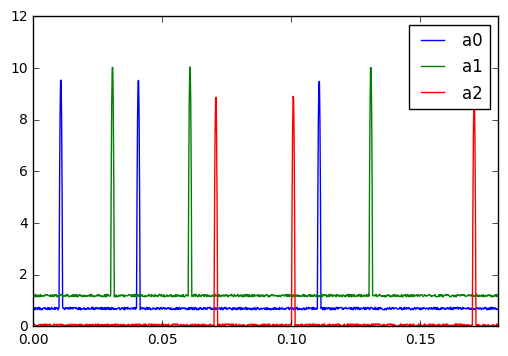

In [3]:
# generates a synthetic data
data = gen_truck_raw_data(
    sample_rate=5000, speed=50, vehicle_layout='O--O------O-',
    sensors_distance= [1, 2], p_signal_noise=10.0
)

data.plot()
plt.show()

In [4]:
data.head()

,a0,a1,a2
0.000000,0.730944,1.180898,0.092194
0.000200,0.679273,1.201649,0.097281
0.000400,0.646758,1.153907,0.075608
0.000601,0.732222,1.211323,0.077465
0.000801,0.724244,1.146235,0.049052


## Creating the file

In [5]:
f = h5py.File('/tmp/wim.hdf5', 'w')

In [6]:
date_time = datetime.now()
site_id = '001'
lane_id = '01'

dset_id = 'run{}_{}_{}'.format(
    site_id, lane_id, date_time.strftime('%Y%M%d_%H%M%S')
)
dset_id

'run001_01_20174904_004936'

In [7]:
dset = f.create_dataset(
    dset_id, shape=(data.shape[0],),
    dtype=np.dtype([
        (k, float) for k in ['index'] + list(data.keys())
    ])
)

dset['index'] = data.index

for k in data.keys():
    dset[k] = data[k]

In [8]:
# check if all values are the same
df = pd.DataFrame(dset[tuple(data.keys())], index=dset['index'])
np.all(df == data)

True

In [9]:
dset.attrs['date_time'] = date_time.strftime('%Y-%M-%d %H:%M:%S')
dset.attrs['site_id'] = site_id
dset.attrs['lane_id'] = lane_id
dset.attrs['temperature'] = 28.5
dset.attrs['lpr'] = 'AAA9999'  # license plate number

## Reading the file

In [10]:
f = h5py.File('/tmp/wim.hdf5', 'r')


--------------------------------------------------------------------------------
run001_01_20174904_004936
--------------------------------------------------------------------------------
date_time: 2017-49-04 00:49:36
site_id: 001
lane_id: 01
temperature: 28.5
lpr: AAA9999


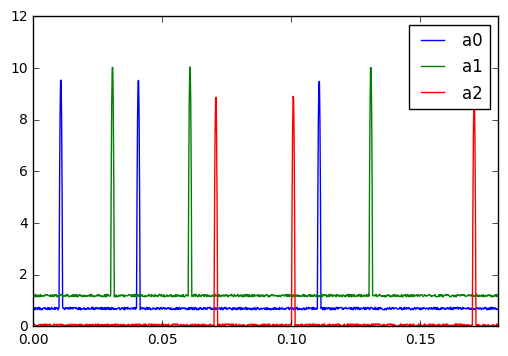

In [11]:
for dset_id in f.keys():
    dset = f[dset_id]
    
    print('')
    print('-'*80)
    print(dset_id)
    print('-'*80)
    print('date_time:', dset.attrs['date_time'])
    print('site_id:', dset.attrs['site_id'])
    print('lane_id:', dset.attrs['lane_id'])
    print('temperature:', dset.attrs['temperature'])
    print('lpr:', dset.attrs['lpr'])
    
    pd.DataFrame(dset[dset.dtype.names[1:]], index=dset['index']).plot()
    plt.show()
    
    f.__delitem__(dset_id)